In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import sklearn as sk
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
(x_train, y_train), (x_test, y_test) =keras.datasets.cifar10.load_data()

In [8]:
datagen = ImageDataGenerator(
    rotation_range=40,       # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,         # Randomly shear images by up to 20%
    zoom_range=0.2,          # Randomly zoom into images by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in any newly created pixels after transformations
)

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [50]:
# Fit the data generator on the training data
datagen.fit(x_train)

In [11]:
base_model=keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    )

In [12]:
for layer in base_model.layers[:-3]:
    layer.trainable=False

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=250, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=125, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



# Model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 250)            │       784,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,405 (3.14 MB)

 Trainable params: 822,405 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [ ]:
#model.fit(datagen.flow(x_train, y_train), epochs=20, validation_data=(x_test, y_test)callbacks=[early_stopping])

SyntaxError: invalid syntax (3816235537.py, line 1)

In [46]:
model.fit(x_train , y_train, epochs=10,validation_data=(x_test, y_test),callbacks=[early_stopping])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7458 - loss: 0.7165 - val_accuracy: 0.6730 - val_loss: 0.9502
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7758 - loss: 0.6384 - val_accuracy: 0.6731 - val_loss: 0.9586
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8048 - loss: 0.5498 - val_accuracy: 0.6817 - val_loss: 0.9868
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8268 - loss: 0.4851 - val_accuracy: 0.6789 - val_loss: 1.0443
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8548 - loss: 0.4095 - val_accuracy: 0.6702 - val_loss: 1.1127
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8677 - loss: 0.3707 - val_accuracy: 0.6643 - val_loss: 1.1759


In [47]:
final_train_predictions = np.argmax(model.predict(x_train), axis=1)
final_test_predictions = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_train, final_train_predictions))
print(classification_report(y_test, final_test_predictions))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5000
           1       0.90      0.93      0.92      5000
           2       0.79      0.69      0.73      5000
           3       0.71      0.52      0.60      5000
           4       0.77      0.77      0.77      5000
           5       0.60      0.84      0.70      5000
           6       0.83      0.90      0.87      5000
           7       0.88      0.83      0.86      5000
           8       0.91      0.90      0.90      5000
           9       0.95      0.82      0.88      5000

    accuracy                           0.81     50000
   macro avg       0.82      0.81      0.81     50000
weighted avg       0.82      0.81      0.81     50000

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.79      0.83      0.81     

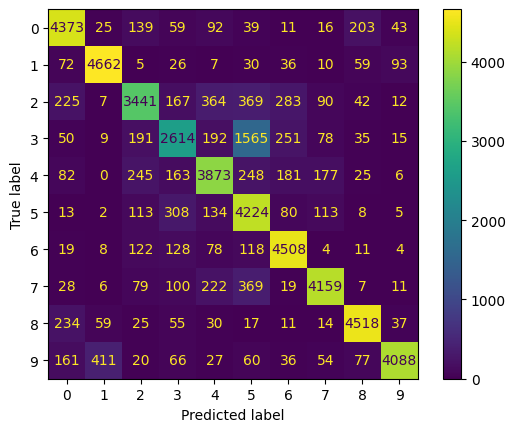

In [48]:
cm=confusion_matrix(y_train, final_train_predictions)
cm_display = sk.metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()

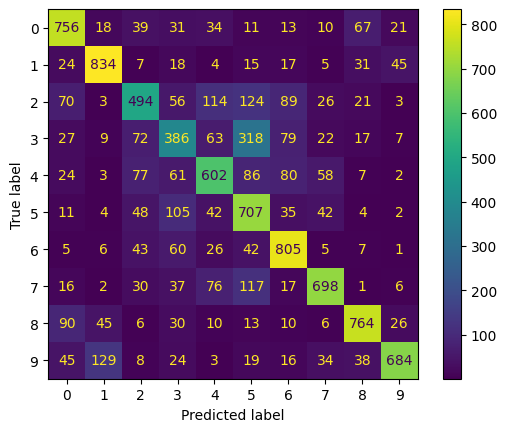

In [49]:
cm=confusion_matrix(y_test, final_test_predictions)
cm_display = sk.metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()